# Cost vs Service Tradeoffs: The Fundamental Scheduling Dilemma

This notebook demonstrates a fundamental conflict in scheduling: **cost and service quality compete** with each other.

Understanding cost-service tradeoffs is critical because:
- Lower cost usually means fewer resources, which can reduce service quality
- Higher service quality usually means more resources, which increases cost
- You cannot simultaneously minimize cost and maximize service quality
- Every schedule makes tradeoffs between these competing objectives


## Key Concepts

**Cost and Service Conflict** because both depend on resource levels:
- More resources (staff, equipment) → Better service but higher cost
- Fewer resources → Lower cost but can degrade service
- This conflict is fundamental and cannot be eliminated

**Tradeoff Curve (Pareto Frontier)**:
- Shows all efficient solutions where you cannot improve one objective without worsening the other
- Solutions on the frontier are "efficient" (cannot improve without tradeoff)
- Solutions off the frontier are "inefficient" (can improve without tradeoff)

**Finding the Right Balance**:
- Depends on your priorities and context
- Some situations require prioritizing service (healthcare, safety)
- Other situations require prioritizing cost (low-margin operations)
- Most situations require a middle ground

**Critical insight**: There is no single "best" schedule. The best schedule depends on your priorities and what tradeoffs you're willing to accept.


## Scenario: Hospital Emergency Department Staffing

You manage an emergency department that must balance patient care quality with labor costs.

**Decision**: How many nurses to schedule per shift?

**Objective 1 - Minimize Cost**: Fewer nurses = lower labor costs
**Objective 2 - Maximize Service Quality**: More nurses = better patient care, shorter wait times

**The Conflict**: 
- More nurses improve service but increase cost
- Fewer nurses reduce cost but can degrade service (longer waits, lower quality care)
- You cannot have both low cost and high service simultaneously


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you may need to install packages. This cell can be skipped if running locally and packages are already installed.


In [1]:
# Install required packages if needed (for Google Colab)
# Can be skipped if already installed locally
%pip install matplotlib pandas numpy scipy -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## Step 3: Define the Cost-Service Tradeoff Relationship

Let's model how staffing levels affect both cost and service quality:


In [3]:
# Define tradeoff relationship
# Staffing level (nurses per shift) affects both cost and service quality

hourly_wage = 45  # $ per hour per nurse
shift_hours = 8   # 8-hour shifts
avg_patients_per_shift = 40  # Average patient arrivals per shift

def calculate_cost(num_nurses):
    """More nurses = higher cost (linear relationship)"""
    return num_nurses * hourly_wage * shift_hours

def calculate_service_quality(num_nurses):
    """More nurses = better service, but with diminishing returns"""
    # Service quality measured as patient satisfaction score (0-100)
    # More nurses improve service, but each additional nurse has less impact
    base_quality = 30  # Minimum quality with very few nurses
    max_quality = 95   # Maximum achievable quality
    
    # Diminishing returns: quality improves quickly at first, then levels off
    # Using a logarithmic relationship
    if num_nurses <= 0:
        return base_quality
    
    # Quality increases with nurses, but with diminishing returns
    quality_increase = (max_quality - base_quality) * (1 - np.exp(-num_nurses / 8))
    return base_quality + quality_increase

# Generate solutions across different staffing levels
staffing_levels = np.linspace(3, 15, 50)  # From 3 to 15 nurses
costs = [calculate_cost(n) for n in staffing_levels]
service_qualities = [calculate_service_quality(n) for n in staffing_levels]

# Create DataFrame
tradeoff_df = pd.DataFrame({
    'Staffing_Level': staffing_levels,
    'Cost': costs,
    'Service_Quality': service_qualities
})

print("COST-SERVICE TRADEOFF RELATIONSHIP:")
print("=" * 70)
print("Staffing Level → Affects both Cost and Service Quality")
print("\nSample solutions:")
display(tradeoff_df.head(10).round(2))
print(f"\n... (showing first 10 of {len(tradeoff_df)} solutions) ...")


COST-SERVICE TRADEOFF RELATIONSHIP:
Staffing Level → Affects both Cost and Service Quality

Sample solutions:


,Staffing_Level,Cost,Service_Quality
0,3.00,1080.00,50.33
1,3.24,1168.16,51.67
2,3.49,1256.33,52.98
3,3.73,1344.49,54.25
4,3.98,1432.65,55.47
5,4.22,1520.82,56.67
6,4.47,1608.98,57.82
7,4.71,1697.14,58.94
8,4.96,1785.31,60.03
9,5.20,1873.47,61.08



... (showing first 10 of 50 solutions) ...


## Step 4: Visualize the Tradeoff (Pareto Frontier)

The Pareto frontier shows all efficient solutions where you cannot improve one objective without worsening the other:


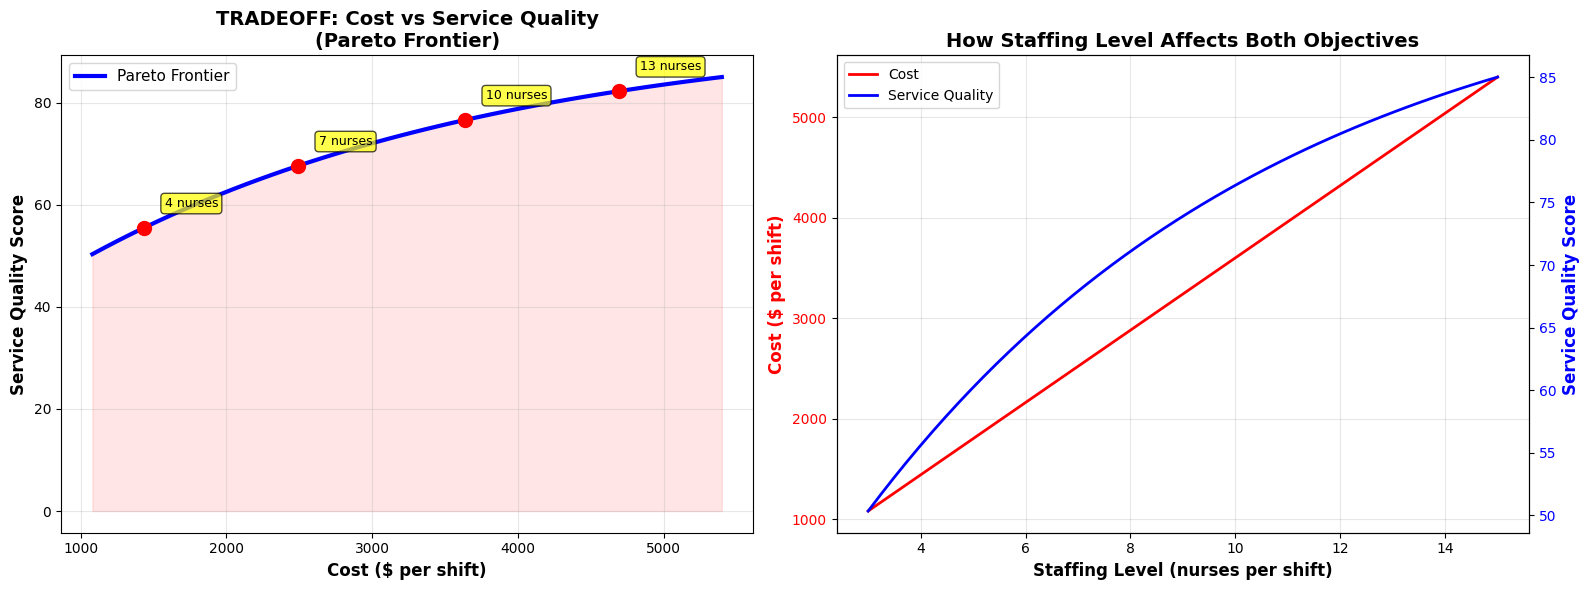


Key Insight:
  - Higher staffing → Higher cost AND higher service quality
  - Lower staffing → Lower cost BUT lower service quality
  - You cannot have both low cost AND high service simultaneously
  - The Pareto frontier shows all efficient tradeoff points


In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cost vs Service Quality (Pareto Frontier)
ax1.plot(tradeoff_df['Cost'], tradeoff_df['Service_Quality'], 'b-', linewidth=3, label='Pareto Frontier')
ax1.set_xlabel('Cost ($ per shift)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Service Quality Score', fontsize=12, fontweight='bold')
ax1.set_title('TRADEOFF: Cost vs Service Quality\n(Pareto Frontier)', fontweight='bold', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# Highlight key points
key_staffing = [4, 7, 10, 13]
for staff in key_staffing:
    idx = np.argmin(np.abs(tradeoff_df['Staffing_Level'] - staff))
    ax1.plot(tradeoff_df.iloc[idx]['Cost'], tradeoff_df.iloc[idx]['Service_Quality'], 
            'ro', markersize=10)
    ax1.annotate(f'{int(staff)} nurses', 
                (tradeoff_df.iloc[idx]['Cost'], tradeoff_df.iloc[idx]['Service_Quality']),
                xytext=(15, 15), textcoords='offset points', fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Shade inefficient region
ax1.fill_between(tradeoff_df['Cost'], 0, tradeoff_df['Service_Quality'], 
                alpha=0.1, color='red', label='Inefficient Region')

# Plot 2: Staffing Level vs Outcomes
ax2_twin = ax2.twinx()
line1 = ax2.plot(tradeoff_df['Staffing_Level'], tradeoff_df['Cost'], 
                 'r-', linewidth=2, label='Cost')
ax2.set_xlabel('Staffing Level (nurses per shift)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cost ($ per shift)', fontsize=12, color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')

line2 = ax2_twin.plot(tradeoff_df['Staffing_Level'], tradeoff_df['Service_Quality'], 
                     'b-', linewidth=2, label='Service Quality')
ax2_twin.set_ylabel('Service Quality Score', fontsize=12, color='b', fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor='b')

ax2.set_title('How Staffing Level Affects Both Objectives', fontweight='bold', fontsize=14)
ax2.grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - Higher staffing → Higher cost AND higher service quality")
print("  - Lower staffing → Lower cost BUT lower service quality")
print("  - You cannot have both low cost AND high service simultaneously")
print("  - The Pareto frontier shows all efficient tradeoff points")


In [5]:
# Select specific solutions to compare
solutions_to_compare = [4, 6, 8, 10, 12]  # Different staffing levels

comparison = []
for staff in solutions_to_compare:
    idx = np.argmin(np.abs(tradeoff_df['Staffing_Level'] - staff))
    comparison.append({
        'Staffing Level': int(staff),
        'Cost ($)': tradeoff_df.iloc[idx]['Cost'],
        'Service Quality': tradeoff_df.iloc[idx]['Service_Quality'],
        'Strategy': ['Min Cost', 'Low Cost', 'Balanced', 'High Service', 'Max Service'][solutions_to_compare.index(staff)]
    })

comparison_df = pd.DataFrame(comparison)
comparison_df = comparison_df[['Strategy', 'Staffing Level', 'Cost ($)', 'Service Quality']]

print("COMPARISON: Different Staffing Options on Tradeoff Curve")
print("=" * 70)
display(comparison_df.round(2))

print("\nObservations:")
print("  - Strategy 1 (Min Cost): Lowest cost, but lowest service quality")
print("  - Strategy 5 (Max Service): Highest service quality, but highest cost")
print("  - Strategies 2-4: Tradeoffs between cost and service quality")
print("  - Improving one objective worsens the other (this is the tradeoff)")
print("\n  → Which strategy is 'best' depends on your priorities!")


COMPARISON: Different Staffing Options on Tradeoff Curve


,Strategy,Staffing Level,Cost ($),Service Quality
0,Min Cost,4,1432.65,55.47
1,Low Cost,6,2137.96,64.06
2,Balanced,8,2843.27,70.78
3,High Service,10,3636.73,76.61
4,Max Service,12,4342.04,80.61



Observations:
  - Strategy 1 (Min Cost): Lowest cost, but lowest service quality
  - Strategy 5 (Max Service): Highest service quality, but highest cost
  - Strategies 2-4: Tradeoffs between cost and service quality
  - Improving one objective worsens the other (this is the tradeoff)

  → Which strategy is 'best' depends on your priorities!


## Step 6: Service Level Targets and Their Cost Impact

What happens when you set specific service quality targets?


In [6]:
# Define service level targets
service_targets = [60, 70, 80, 85, 90]

target_analysis = []
for target in service_targets:
    # Find minimum staffing to meet target
    feasible = tradeoff_df[tradeoff_df['Service_Quality'] >= target]
    if len(feasible) > 0:
        min_staffing_idx = feasible['Staffing_Level'].idxmin()
        min_staffing = tradeoff_df.loc[min_staffing_idx, 'Staffing_Level']
        cost_at_target = tradeoff_df.loc[min_staffing_idx, 'Cost']
        actual_quality = tradeoff_df.loc[min_staffing_idx, 'Service_Quality']
        
        target_analysis.append({
            'Service Target': target,
            'Required Staffing': round(min_staffing, 1),
            'Cost ($)': round(cost_at_target, 2),
            'Actual Quality': round(actual_quality, 1)
        })

target_df = pd.DataFrame(target_analysis)

print("SERVICE LEVEL TARGETS AND COST IMPACT:")
print("=" * 70)
display(target_df)

print("\nKey Insights:")
print("  - Higher service targets require more staffing (higher cost)")
print("  - Each additional point of service quality costs more (diminishing returns)")
print("  - Setting aggressive targets can be very expensive")
print("  - The 'right' target depends on your priorities and budget")


SERVICE LEVEL TARGETS AND COST IMPACT:


,Service Target,Required Staffing,Cost ($),Actual Quality
0,60,5.0,1785.31,60.0
1,70,7.7,2755.10,70.0
2,80,11.8,4253.88,80.2
3,85,15.0,5400.00,85.0



Key Insights:
  - Higher service targets require more staffing (higher cost)
  - Each additional point of service quality costs more (diminishing returns)
  - Setting aggressive targets can be very expensive
  - The 'right' target depends on your priorities and budget


## Step 7: Visualize the Decision Space

Let's create a comprehensive view of the tradeoff decision space:


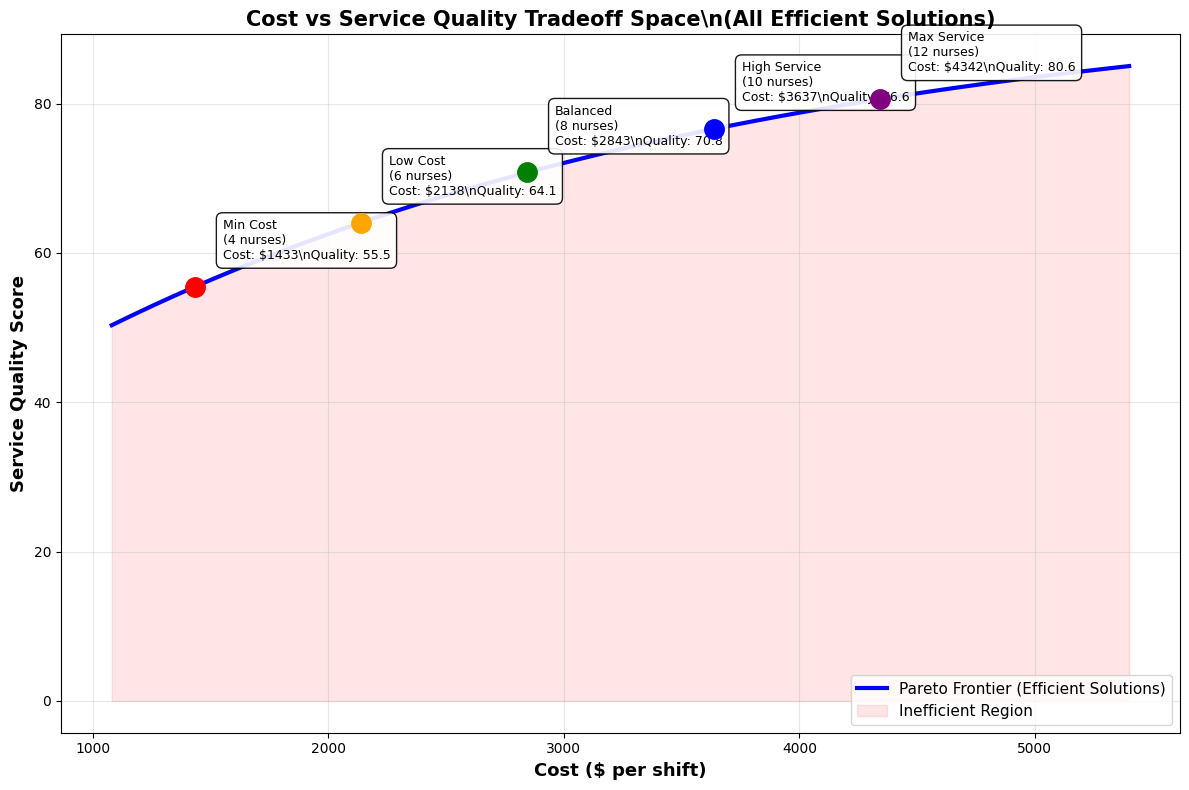


Key Insights:
  - Points on the frontier are 'efficient' (cannot improve one without worsening other)
  - Points below the frontier are 'inefficient' (can improve without tradeoff)
  - You must choose which point on the frontier fits your priorities
  - There is no 'best' solution - only solutions that match your priorities


In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Pareto frontier
ax.plot(tradeoff_df['Cost'], tradeoff_df['Service_Quality'], 'b-', linewidth=3, 
        label='Pareto Frontier (Efficient Solutions)', zorder=2)

# Highlight comparison points
colors = ['red', 'orange', 'green', 'blue', 'purple']
for i, staff in enumerate(solutions_to_compare):
    idx = np.argmin(np.abs(tradeoff_df['Staffing_Level'] - staff))
    cost_val = tradeoff_df.iloc[idx]['Cost']
    qual_val = tradeoff_df.iloc[idx]['Service_Quality']
    strategy = comparison_df.iloc[i]['Strategy']
    ax.plot(cost_val, qual_val, 'o', color=colors[i], markersize=14, zorder=3)
    ax.annotate(f'{strategy}\n({int(staff)} nurses)\nCost: ${cost_val:.0f}\\nQuality: {qual_val:.1f}',
               (cost_val, qual_val), xytext=(20, 20), textcoords='offset points',
               fontsize=9, bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9))

# Shade inefficient region
ax.fill_between(tradeoff_df['Cost'], 0, tradeoff_df['Service_Quality'], 
                alpha=0.1, color='red', label='Inefficient Region')

ax.set_xlabel('Cost ($ per shift)', fontsize=13, fontweight='bold')
ax.set_ylabel('Service Quality Score', fontsize=13, fontweight='bold')
ax.set_title('Cost vs Service Quality Tradeoff Space\\n(All Efficient Solutions)', 
            fontsize=15, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("  - Points on the frontier are 'efficient' (cannot improve one without worsening other)")
print("  - Points below the frontier are 'inefficient' (can improve without tradeoff)")
print("  - You must choose which point on the frontier fits your priorities")
print("  - There is no 'best' solution - only solutions that match your priorities")


## Summary: Understanding Cost-Service Tradeoffs

**Cost and Service Conflict**:
- Both depend on resource levels (more resources = better service but higher cost)
- This conflict is fundamental and cannot be eliminated
- You cannot simultaneously minimize cost and maximize service quality

**Tradeoff Curve (Pareto Frontier)**:
- Shows all efficient solutions where you cannot improve one objective without worsening the other
- Solutions on the frontier are "efficient"
- Solutions off the frontier are "inefficient"

**Finding the Right Balance**:
- Depends on your priorities and context
- Some situations require prioritizing service (healthcare, safety-critical)
- Other situations require prioritizing cost (low-margin operations)
- Most situations require a middle ground

**Practical Implications**:
- Recognize that cost-service tradeoffs are inevitable
- Understand what tradeoffs your schedule makes
- Set service level targets that are realistic given cost constraints
- Communicate tradeoffs to stakeholders who may have different priorities
- The "best" schedule depends on your priorities, not just mathematical optimality
